# **- Machine Learning -**
# _* Classification *_
## **+ ``Logistic Regression`` and ``Confusion Matrix`` +**
### **+ _Diabetes Data_ +**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Diabetes Data **:**

+ Read in the data set using Pandas **:**
+ Veri Seti **'.txt'** dosyası olduğu için, **Pandas**'ın **'.read_table( )'** fonksiyonunu kullanarak Veri Setini okuyacağız **:**

In [2]:
df = pd.read_table('diabetesdata.txt')
df

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **'Diabetes' Veri Setindeki kolonlar SIRASI ile :**
+ **Preg = Pregnancies =** Gebelikler.
+ **Glucose =** Glukoz.
+ **BP = Blood Pressure =** Tansiyon.
+ **SkinThick = Skin Thickness =** Cilt kalınlığı.
+ **Insul =** Insulin.
+ **BMI = Body Mass Index =** Vücut Kitle İndeksi.
+ **DPF = Diabetes Pedigree Function =** Diyabetin Soyağacı Fonksiyonu.
+ **Age =** Yaş.
+ **Diabetes =** Diyabet mi? Değil mi?

+ Kolonların **, istatistiki** değerlerine bakalım **:**

In [4]:
df.describe()

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


+ Her zaman ki gibi **ilk olarak, 'Target'** ve **'Feature'** kolonlarını birbirlerinden ayıralım **:**

In [3]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [9]:
X.head(3)

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [8]:
y.tail(3)

765    0
766    1
767    0
Name: Diabetes, dtype: int64

+ **Logistic Regression** modülünü çağıralım **:**
<br> **+--- NOTE --->** Ancak aşağıda fark ettiysek **,** yine **Linear Modeller** kütüphanesinden çağırıyoruz...

In [4]:
from sklearn.linear_model import LogisticRegression

In [59]:
LogisticRegression()

LogisticRegression()

**LogisticRegression( )** içerisinde SHIFT + TAB tuşlarına basarsak, **kullanabileceğimiz metodları** görebiliriz...

---
---
--------->
### **Modelimizi Yaratalım (Kuralım) :**
<---------

---
---

+ Her zaman ki gibi **ilk olarak, 'Target'** ve **'Feature'** kolonlarını birbirlerinden ayıralım **:**

In [6]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

+ Şimdi de **;** Veri Setimizi, **TRAIN Set** ve **TEST Set** olmak üzere ayıralım **:**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

**++++ CRITICAL NOTE ++++**
<br> Veri Setini RASTGELE parçalara böldüğümüzde bazen çok saçma bir dağılım olabiliyor... Yani mesela bu Veri Seti için konuşursak **;** RASTGELE **%20**'lik bir TEST Veri Seti oluşturduğumuzda, o TEST Veri Seti içesinde hiç **kadın** verisi olmayabilir. Yani öyle denk gelebilir... Böyle bir durumun olmasını istemiyorsak **;** Yani hem TRAIN hem de TEST Veri Setindeki **kadın-erkek dağılımının,** gerçek Veri Setinde nasıl bir dağılım varsa öyle olmasını isteriyorsak **, ( stratify=... )** metodunu kullanırız... Böyle olması, bizi daha doğru bir tahmine götürür...
<br> Burada **( stratify=y )** dememizin sebebi de **;** modelimizin, **'y'** kolonuna göre yani **Gender** kolonuna göre yani OUTPUT'a göre **stratify** etmesini istiyoruz...
<br> **+--- NOTE ---> Regresyon**'da bunu **yapamayız...** Çünkü orada sadece **'0'** ve **'1'** gibi bir **sınıflandırma** kavramı YOK. Her şey numerik ve veriler birbirlerinden çok farklı olduğu için eşit dağıtmaya çalışmak gibi bir mantık olamaz...

+ TRAIN ve TEST olarak ayırdıktan sonra **Logistic Regression** modeli kuralım ve TRAIN Set'leri FIT edelim **:**

In [7]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000 , penalty='none')

logmodel.fit(X_train , y_train)

LogisticRegression(max_iter=1000, penalty='none')

+ TEST Verilerini kullanarak tahminde bulunalım **:**

In [8]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

Yukarıda fark ettiysek, tahminleme yaparken herhangi bir **OLASILIK sonucu vermedi...** Çünkü DEFAULT olarak **"0.5" threshold**'unu kullandı ve **"0.5"**'in üstündeki sonuçlara **"1"**, altındaki sonuçlara da **"0"** dedi... Bu şekilde bir TAHMİN yaptı...

+ Bir de GERÇEK TEST Veri Seti'ne bakalım **:**

In [49]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

+ Use **score** method to get **Test accuracy** of model **:**
+ Modelin **TEST Set'lerinin doğruluğunu ('accuracy''ini)** elde etmek için **'.score'** metodunu kullanalım **:**

In [9]:
score = logmodel.score(X_test , y_test)
print(score)

0.7857142857142857


**+--- NOTE ---> Logistic Regression,** **'score'** için DEFAULT olarak **accuracy (doğruluk) metriğini** döndürüyor...

+ Şimdi de **; Intercept** ve **Coefficient**'leri güzel bir şekilde gösterip formülümüzü daha net görelim **:**

In [10]:
Model_intercept = pd.DataFrame({"Variables": 'Intercept' , "Coefficients": logmodel.intercept_[0]}, index=[0])

Model_coefficients = pd.DataFrame({"Variables": X.columns , "Coefficients": np.transpose(logmodel.coef_[0])})

Model_coefficients = pd.concat([Model_intercept , Model_coefficients]).reset_index(drop=True)

print(Model_coefficients)

   Variables  Coefficients
0  Intercept     -8.476314
1       Preg      0.135825
2    Glucose      0.034562
3         BP     -0.016874
4  SkinThick     -0.004855
5      Insul     -0.000622
6        BMI      0.097109
7        DPF      1.259897
8        Age      0.014323


+ Use **score** method to get **Training accuracy** of model **:**
+ Modelin **TRAINING Set'lerinin doğruluğunu ('accuracy''ini)** elde etmek için **'.score'** metodunu kullanalım **:**

In [11]:
score = logmodel.score(X_train, y_train)
print(score)

0.7866449511400652


**+--- NOTE --->** Ama bizim önceliğimiz her zaman ilk olarak TEST Set üzerindeki metrikleri görmektir...

---
---
---
---

## **Confusion Matrix**

+ Import the **metrics class :**
+ **Scikit-Learn kütüphanesinin Metrikler sınıfının Confusion Matrix modülünü** çağıralım **:**

In [12]:
from sklearn.metrics import confusion_matrix

+ Confusion Matrix üretelim **:**
+ Confusion Matrix'i ne ile üretmemiz lazım ?
<br> GERÇEK TEST Veri Seti ve TAHMİN TEST Veri Seti'ni karşılaştırmamız lazım **:**

In [13]:
cnf_matrix = confusion_matrix(y_test , y_pred)
cnf_matrix

array([[92,  8],
       [25, 29]], dtype=int64)

In [14]:
#   OR

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
cnf_matrix

array([[92,  8],
       [25, 29]], dtype=int64)

Yani kurduğumuz Modelin yukarıdaki **Confusion Metrix**'ine bakarsak **;** İlk Satırında **, '100'** tane Diyabet **olmamış** insan var... Modelimiz ile bunun **'92'** tanesini **doğru tahmin** etmişiz ama **'8'** tanesinde **yanılmışız** ve bunlar diyabet demişiz...
<br> İkinci satırında da **'54'** tane Diyabet **olan** insan var... Modelimiz ile **, '25'** tane Diyabet olan insan için **, yanılmışız** ve hayır bunlar diyabet değil demişiz. **'29'** tane diyabet olan hastaya da evet bunlar Diyabet hastası demişiz ve **doğru bilmişiz**...

Yani **'accuracy'**'e bakarsak başarımız **%78...** gibi ama aslında olan bu değil. Modelimiz daha **başarısız** bir modeldir... Çünkü **modelimiz , gerçekten hasta olan insanları bulmakta zorlanıyor**...
<br> **True Positive Rate (recall, sensitivity, power)**'ye bakarsak başarımız bayağı az... Ve hasta olan insanları bulmak için bir model geliştirmeye çalıştığımızdan, **True Positive Rate (recall, sensitivity, power)** metriğini kullanmalıyız...

+ **Confusion Matrix**'i grafik olarak gösterelim **:**

In [64]:
def plot_conf_mat(y_testing , y_predictions):
    """
    + Plots a nice looking 'confusion matrix' using Seaborn's heatmap() :
    + Seaborn'un heatmap() yöntemini kullanarak güzel görünen bir 'confusion matrisi' çizelim :
    """
    sns.set(font_scale=1.7)
    fig , ax = plt.subplots(figsize=(4 , 4))
    ax = sns.heatmap(confusion_matrix(y_testing , y_predictions) ,
                     annot=True ,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom , top = ax.get_ylim()
    ax.set_ylim(bottom + 0.1 , top - 0.1)

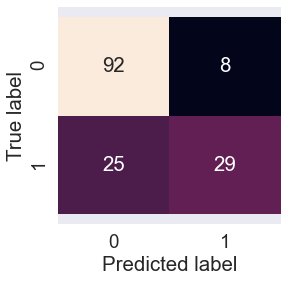

In [65]:
plot_conf_mat(y_test , y_pred)

In [66]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.5370370370370371


In [25]:
X_test

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
488,4,99,72,17,0,25.6,0.294,28
413,1,143,74,22,61,26.2,0.256,21
112,1,89,76,34,37,31.2,0.192,23
222,7,119,0,0,0,25.2,0.209,37
711,5,126,78,27,22,29.6,0.439,40
...,...,...,...,...,...,...,...,...
139,5,105,72,29,325,36.9,0.159,28
178,5,143,78,0,0,45.0,0.190,47
654,1,106,70,28,135,34.2,0.142,22
110,3,171,72,33,135,33.3,0.199,24


+ **Yarattığımız model içerisinde , ``'Olasılık Tahmini'``** yapmak istersek **, ``predict_proba( )``** metodunu kullanacağız **:**
<br> Burada **,** modelimizin eğitim esnasında asla görmediği **'X_test'** Veri Setinin **Olasılık Tahminlerini** bulalım **:**

In [59]:
logmodel.predict_proba(X_test)

array([[0.92766768, 0.07233232],
       [0.83534288, 0.16465712],
       [0.95826737, 0.04173263],
       [0.54295589, 0.45704411],
       [0.71154132, 0.28845868],
       [0.7773145 , 0.2226855 ],
       [0.9705417 , 0.0294583 ],
       [0.90448317, 0.09551683],
       [0.22067558, 0.77932442],
       [0.95220937, 0.04779063],
       [0.78436229, 0.21563771],
       [0.94748324, 0.05251676],
       [0.24129565, 0.75870435],
       [0.97123073, 0.02876927],
       [0.9521554 , 0.0478446 ],
       [0.71307927, 0.28692073],
       [0.72995079, 0.27004921],
       [0.47857611, 0.52142389],
       [0.85535253, 0.14464747],
       [0.30078395, 0.69921605],
       [0.24526574, 0.75473426],
       [0.91612691, 0.08387309],
       [0.56841936, 0.43158064],
       [0.97141313, 0.02858687],
       [0.76948873, 0.23051127],
       [0.82665413, 0.17334587],
       [0.52197123, 0.47802877],
       [0.91606819, 0.08393181],
       [0.95266307, 0.04733693],
       [0.93618579, 0.06381421],
       [0.

+ Mesela yukarıda OUT'da, SON **Köşeli Parantez** içerisindeki **Olasılık Tahmini** olan **'0.95074135'** nedir **?**
<br> Diyabet **olmama** olasılığıdır...
+ Peki aynı **Köşeli Parantez** içerisindeki (**Veri**'deki) diğer **Olasılık Tahmini** olan **'0.04925865'** nedir **?**
<br> O da diyabet **olma** olasılığıdır...

**+--- NOTE ---> Threshold** default olarak **'0.5'** olduğu için, **'0.5'**'in üzerindeki olasılıklara **'1'**, altındaki olasılıklara da **'0'** sonucu veriyor...
+ Şimdi de sadece **Diyabet Olma ihtimallerini** alalım. Yani **'0**' numaralı sınıfı **atıp,** sadece **'1'** numaralı sınıftaki verileri seçip gösterelim **:**

In [73]:
y_pred_proba = logmodel.predict_proba(X_test)[:: , 1]
y_pred_proba

array([0.07233232, 0.16465712, 0.04173263, 0.45704411, 0.28845868,
       0.2226855 , 0.0294583 , 0.09551683, 0.77932442, 0.04779063,
       0.21563771, 0.05251676, 0.75870435, 0.02876927, 0.0478446 ,
       0.28692073, 0.27004921, 0.52142389, 0.14464747, 0.69921605,
       0.75473426, 0.08387309, 0.43158064, 0.02858687, 0.23051127,
       0.17334587, 0.47802877, 0.08393181, 0.04733693, 0.06381421,
       0.06113724, 0.00318808, 0.02599122, 0.23247143, 0.69986367,
       0.86855846, 0.16840248, 0.86320997, 0.18033117, 0.14499318,
       0.0891406 , 0.87351986, 0.13907358, 0.46595152, 0.24515015,
       0.22811488, 0.23633294, 0.11870125, 0.5205137 , 0.92480773,
       0.03857826, 0.19199873, 0.64907417, 0.39762328, 0.22152949,
       0.29429406, 0.1564556 , 0.03175918, 0.66156367, 0.70447733,
       0.0589705 , 0.2447077 , 0.02958473, 0.08684208, 0.98174255,
       0.10101238, 0.00173078, 0.81343241, 0.03528671, 0.39989294,
       0.63040966, 0.04266434, 0.3840445 , 0.4093793 , 0.49869

In [61]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

+ Şimdi de, **Prediction**'u manuel olarak kendimiz yapalım **:**

In [74]:
threshold = 0.3

y_pred1 = (y_pred_proba > threshold).astype('int')
y_pred1

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [74]:
metrics.confusion_matrix(y_test , y_pred1)

array([[75, 25],
       [13, 41]], dtype=int64)

In [75]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [75]:
threshold = 0.2

y_pred2 = (logmodel.predict_proba(X_test)[:: , 1] > threshold).astype('float')
y_pred2

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

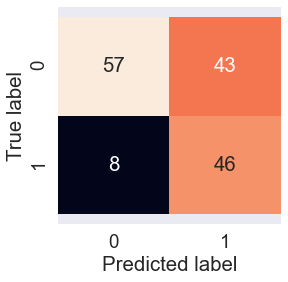

In [76]:
plot_conf_mat(y_test , y_pred2)

Yukarıda yaptığımız, **'y_pred1'** ve **'y_pred2'** tahminleri ile de Diyabet hastaları içerisinden hasta olanları tespit etmek konusunda modelimizin başarızı arttı. ANCAK, bu defa da hasta olmayan insanlar için çok fazla hasta olduklarına dair tahmin yaptı... Yani yine pek başarılı bir model sayılamaz...
<br> Ama **Threshold**'lar arasında da en tercih edilebilir olanı sanırım **'threshold = 0.3'** oldu... Ama tabii bu amacımıza göre de değişir...
<br> Daha doğru kararı **,** hataların bize maliyetlerine göre veririz...

### **ROC Curves**

**#########################**
<br> **AUC =** Eğrinin altında kalan alan.
<br> **fpr =** False positive rate.
<br> **tpr =** True positive rate.
<br> **auc =** Area under the curve.
<br> **#########################**

In [89]:
roc_curve(y_test , y_pred_proba)

(array([0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.05, 0.05, 0.06, 0.06,
        0.08, 0.08, 0.1 , 0.1 , 0.12, 0.12, 0.17, 0.17, 0.18, 0.18, 0.21,
        0.21, 0.22, 0.22, 0.23, 0.23, 0.24, 0.24, 0.25, 0.25, 0.36, 0.36,
        0.37, 0.37, 0.38, 0.38, 0.42, 0.42, 0.44, 0.44, 0.47, 0.47, 0.48,
        0.48, 0.54, 0.54, 0.69, 0.69, 0.79, 0.79, 0.96, 0.96, 1.  ]),
 array([0.        , 0.        , 0.01851852, 0.01851852, 0.25925926,
        0.25925926, 0.27777778, 0.27777778, 0.37037037, 0.37037037,
        0.38888889, 0.38888889, 0.53703704, 0.53703704, 0.55555556,
        0.55555556, 0.59259259, 0.59259259, 0.61111111, 0.61111111,
        0.66666667, 0.66666667, 0.68518519, 0.68518519, 0.7037037 ,
        0.7037037 , 0.74074074, 0.74074074, 0.75925926, 0.75925926,
        0.77777778, 0.77777778, 0.7962963 , 0.7962963 , 0.81481481,
        0.81481481, 0.83333333, 0.83333333, 0.85185185, 0.85185185,
        0.87037037, 0.87037037, 0.90740741, 0.90740741, 0.92592593,
        0.92592593, 0.

Aşağıdaki, **'``_``'** ataması da **; ``roc_curve(y_test, y_pred_proba)``** metodunun OUTPUT'udur. Yukarıda gördüğümüz gibi, ``roc_curve(y_test, y_pred_proba)``, OUTPUT olarak ÜÇ tane **'array'** çıkarttığından, son **'array'** için de bu işareti yazdık... **``'_'``** işaretinin yerine başka herhangi bir şey de yazabilirdik... 

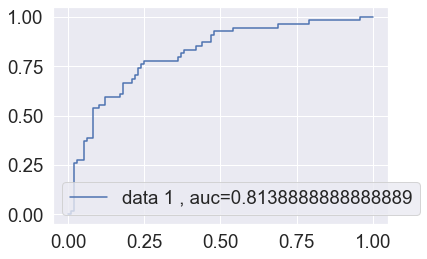

In [88]:
from sklearn.metrics import roc_curve , roc_auc_score

fpr , tpr , _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1 , auc=" + str(auc))
plt.legend(loc=3)
plt.show()

Artık, **'0.8138...'** gibi bir **Sınıflama aracımız** var. Bu, **Threshold independent (Eşikten bağımsız)** bir metriktir. Bu **AUC** değerini kullanarak, hangi Sınıflayıcının **daha iyi olduğunu** bulabiliriz... Farklı metrikleri **'AUC'** ile **karşılaştırabiliriz...**
<br> **+--- NOTE ---> Line (Çizgi)**'nin **altında kalan alan,** ne kadar **"1"**'e yakınsa o kadar iyi bir **Sınıflayıcımız** vardır...

**+--- NOTE --->** ``roc_curve( )`` içerisinde SHIFT + TAB tuşlarına basarak, tüm PARAMETRE'lere, RETURN'lara ve ÖRNEK'lere ulaşabiliriz...
<br> RETURN olarak **; fpr , tpr** ve **thresholds** döndürüyor...
<br> Yani ÜÇÜNCÜ **'array'**'da **,** kullandığı **'threshold'**'ları gösteriyor... Yani **'threshold'**'ların değişimini gösteriyor...

**+--- NOTE --->** ``roc_auc_score( )`` metodu da RETURN olarak **; auc : float** döndürüyor...

---
---
---

In [96]:
df = pd.read_table('diabetesdata.txt')
df.head(3)

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [111]:
X = df[['Glucose' , 'BMI']]
y = df['Diabetes']

+ Split Data Set into Training and Test Sets **:**
+ Veri Setini TRAINING ve TEST Setlerine ayırın **:**

In [112]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1 , stratify=y)

In [113]:
classifier = LogisticRegression(penalty='none')
classifier.fit(X_train , y_train)

LogisticRegression(penalty='none')

+ Plot the **decision boundary**... For that, we will assign a color to each point in the mesh **[x_min, x_max]x[y_min, y_max] :**
+ **Karar Sınırını (Decision Boundary)** çizin... Bunun için ( **[x_min, x_max] . [y_min, y_max]** ) ağındaki her bir noktaya bir renk atayacağız **:**

In [114]:
X.head(3)

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3


In [115]:
X = np.array(X)
X

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

**++++ NOTE ++++**
<br> **``np.meshgrid( )`` fonksiyonu :**
<br>``np.meshgrid( )`` fonksiyonunun amacı **, 'x'** değerleri dizisinden ve **'y'** değerleri dizisinden bir **dikdörtgen ızgara** oluşturmaktır.
<br> https://pybilim.wordpress.com/tag/numpy-meshgrid/

In [116]:
def plot_dec_boundary(estimator , X , Y , h):
    #   Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh ( [x_min, x_max] . [y_min, y_max] )
    X = np.array(X)
    x_min , x_max = X[: , 0].min() - .5 , X[: , 0].max() + .5
    y_min , y_max = X[: , 1].min() - .5 , X[: , 1].max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max, h) , np.arange(y_min , y_max , h))
    Z = estimator.predict(np.c_[xx.ravel() , yy.ravel()])

    #   Put the result into a color plot :
    #   Sonucu bir renk grafiğine koyun :
    Z = Z.reshape(xx.shape)
    plt.figure(1 , figsize=(10 , 10))
    plt.pcolormesh(xx , yy , Z , cmap=plt.cm.Paired)
    
    #   Plot also the points :
    #   Noktaları da çizelim :
    plt.scatter(X[: , 0] , X[: , 1] , c=Y , edgecolors='k' , cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(xx.min() , xx.max())
    plt.ylim(yy.min() , yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

C:\anaconda3\envs\ITUmindset\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-116-99b21196c844>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx , yy , Z , cmap=plt.cm.Paired)


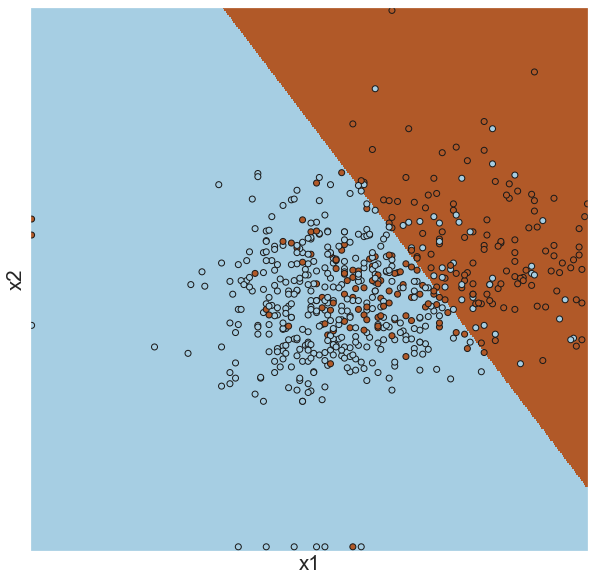

In [117]:
plot_dec_boundary(classifier , X_train , y_train , h=0.25)

C:\anaconda3\envs\ITUmindset\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-116-99b21196c844>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx , yy , Z , cmap=plt.cm.Paired)


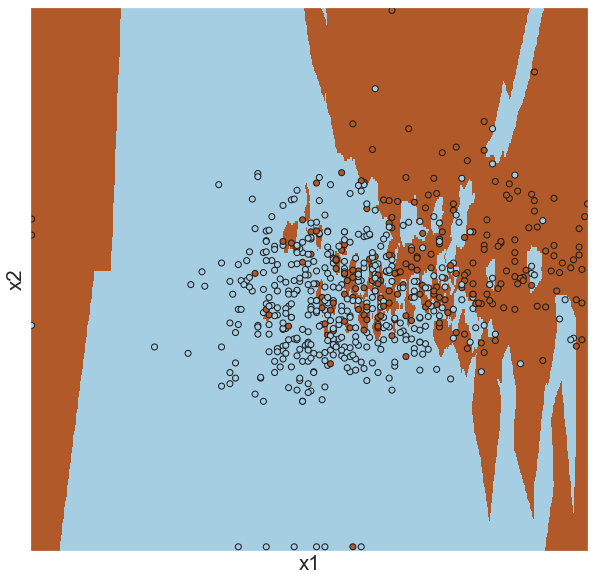

In [118]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train , y_train)
plot_dec_boundary(classifier , X_train , y_train , h=0.25)